In [2]:
pip install seaborn


   ---------------------------------------- 0.0/294.6 kB ? eta -:--:--
   -------------------------------------- - 286.7/294.6 kB 8.6 MB/s eta 0:00:01
   ---------------------------------------- 294.6/294.6 kB 4.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

Final_Dataset=pd.read_csv("Final_Prepared_data2.0.csv")




In [21]:
Final_Dataset.dtypes

Unnamed: 0.1                              int64
Unnamed: 0                                int64
Restaurant_Name                          object
Locality_Restaurant                      object
Ratings_out_of_5_Restaurant             float64
Price_Restaurant                          int64
Price Level__Restaurant                   int64
Latitude_x__Restaurant                  float64
Longitude_x__Restaurant                 float64
Nearest_Place_Index_0                     int64
Distance_to_Place_0_from__Restaurant    float64
Name_Place                               object
Latitude_place_0_x                      float64
Longitude_place_0_x                     float64
Rating_Place                            float64
Place_ID_Place                           object
amusement_park_Place                      int64
art_gallery_Place                         int64
campground_Place                          int64
car_rental_Place                          int64
cemetery_Place                          

In [22]:
num_features=['Ratings_out_of_5_Restaurant','Price_Restaurant', 'Latitude_x__Restaurant',                  
'Longitude_x__Restaurant',                 
'Nearest_Place_Index_0',                    
'Distance_to_Place_0_from__Restaurant', 'Latitude_place_0_x',                     
'Longitude_place_0_x',                     
'Rating_Place' , 'hotel_star_rating_Hotel',                   
'mmt_review_score_Hotel',                  
'Price_Hotel',                               
'Longitude_Hotel',                         
'Latitude_Hotel',                          
'Distance_to_Place_form_Hotel',          
'budget',                                    
'budget_level' ]

In [23]:
num_data=Final_Dataset[num_features] # Create a subset dataframe with numerical columns

In [24]:
correlation_matrix=num_data.corr()

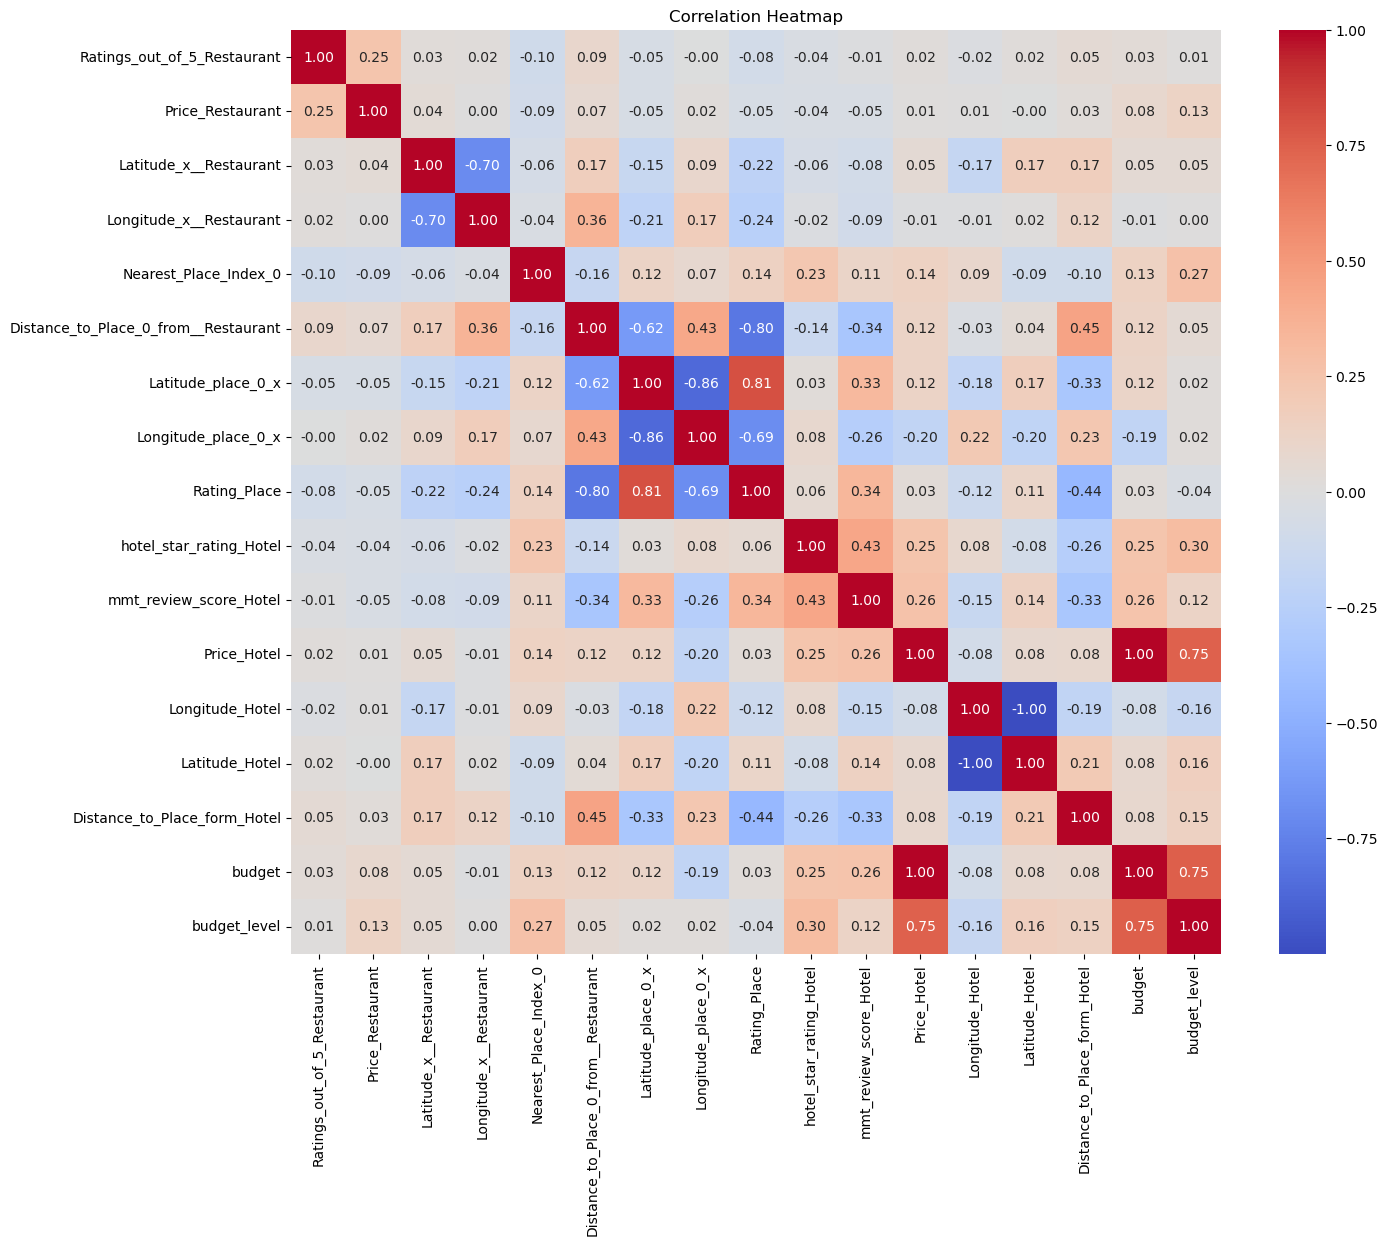

In [25]:
# Plot the heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

C:\Users\Athar\OneDrive\Desktop\TripPlanner\env\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


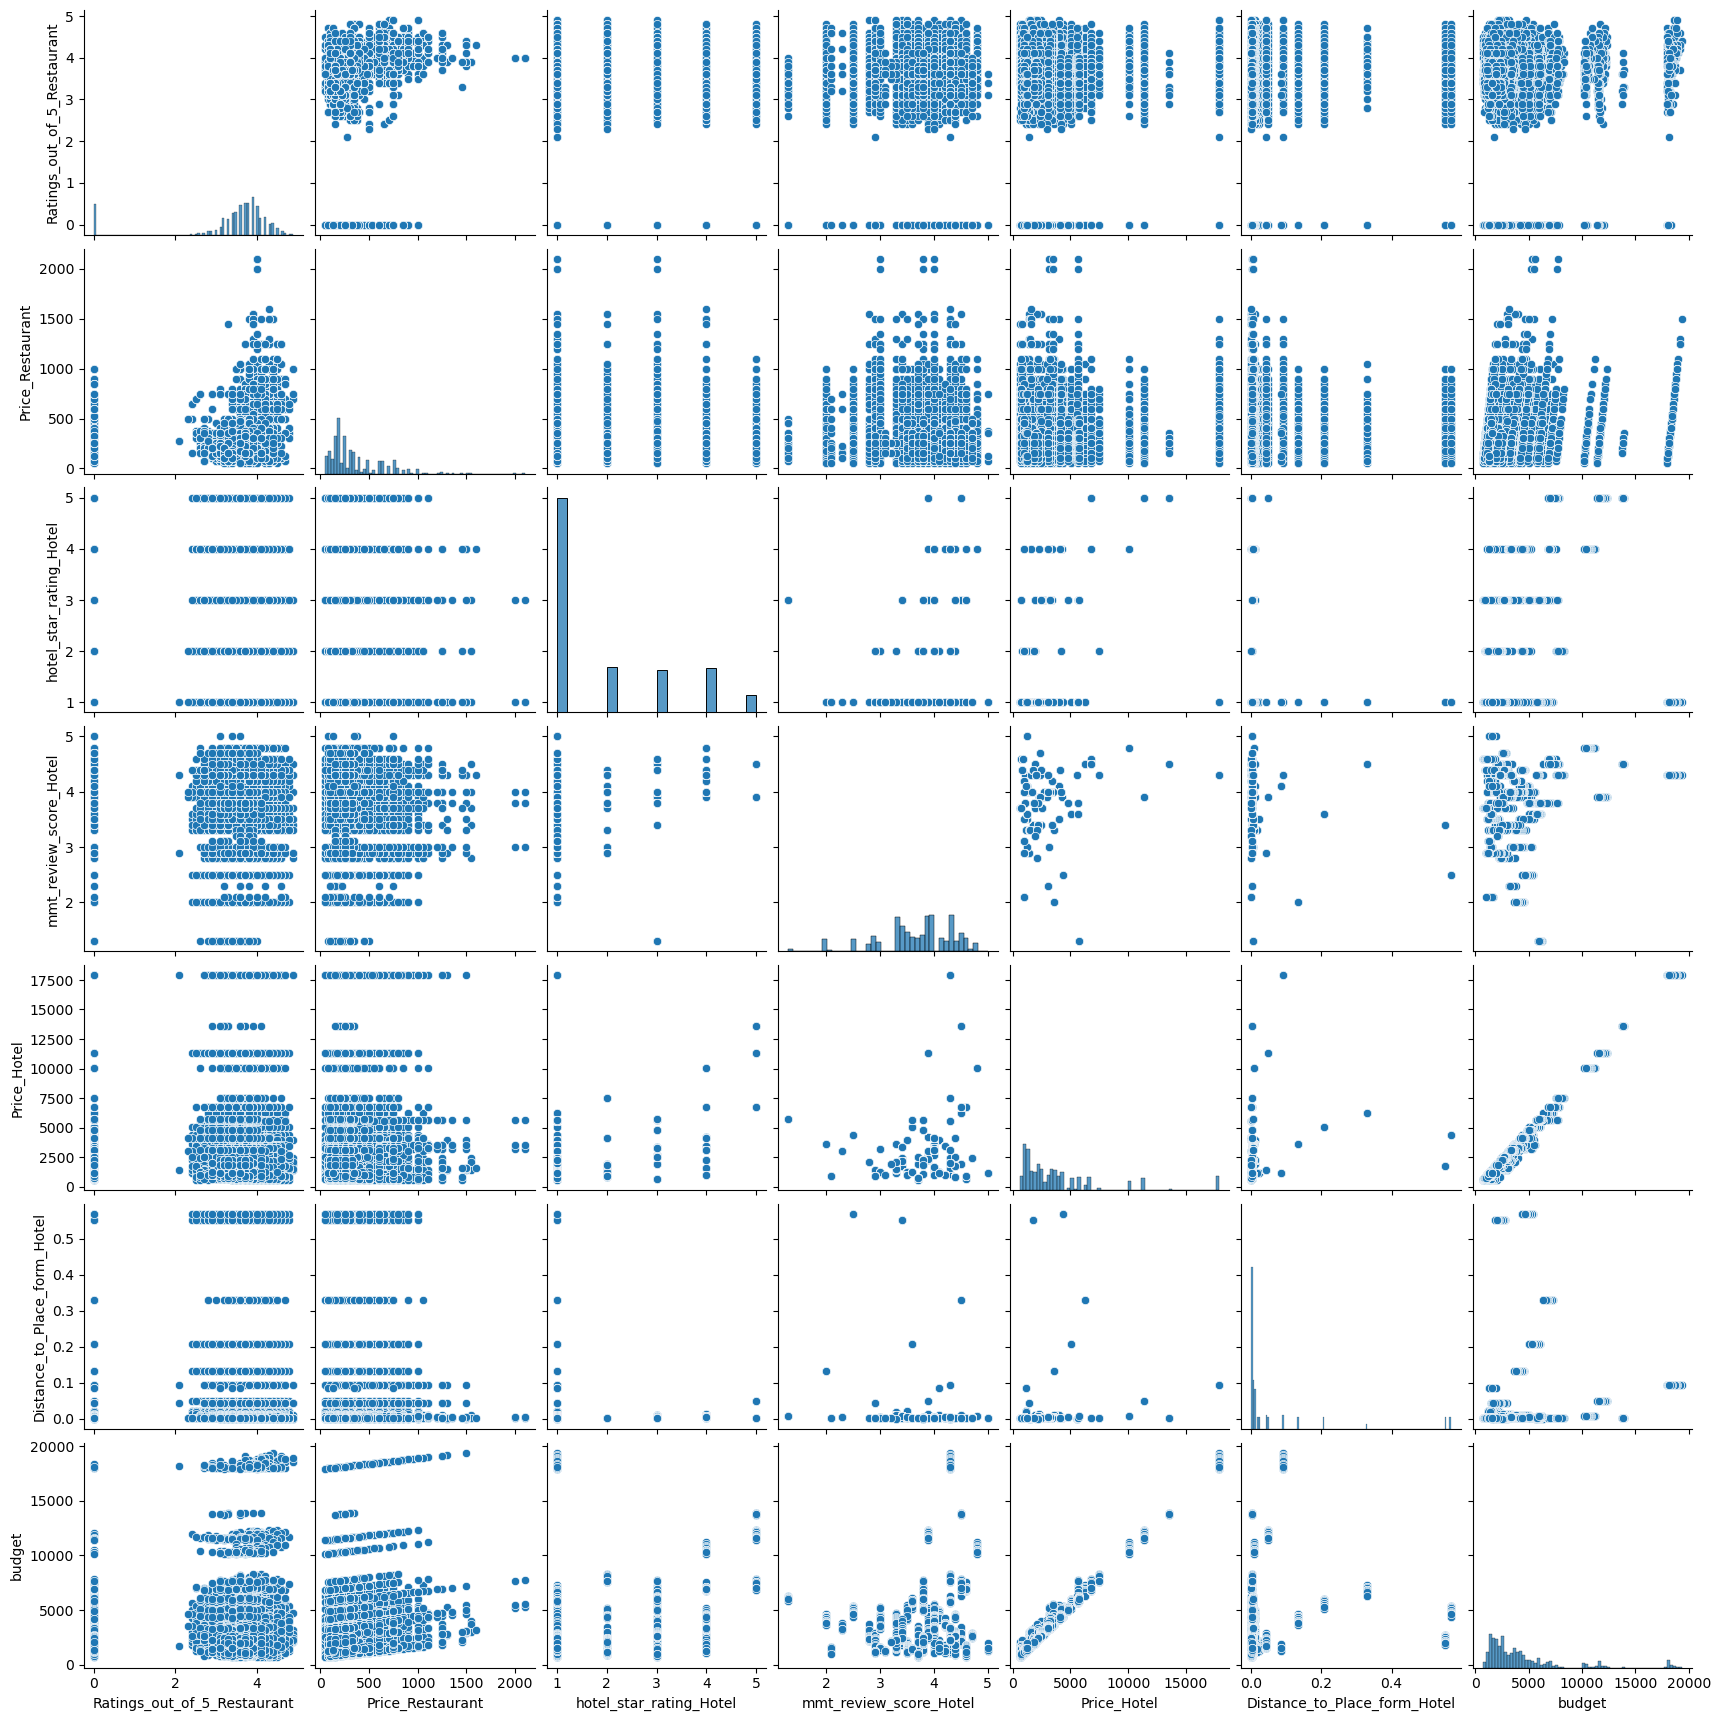

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract relevant numerical columns
numerical_columns = ['Ratings_out_of_5_Restaurant', 'Price_Restaurant', 'hotel_star_rating_Hotel', 'mmt_review_score_Hotel', 'Price_Hotel', 'Distance_to_Place_form_Hotel', 'budget']

# Create a pairplot
sns.pairplot(Final_Dataset[numerical_columns])
plt.show()


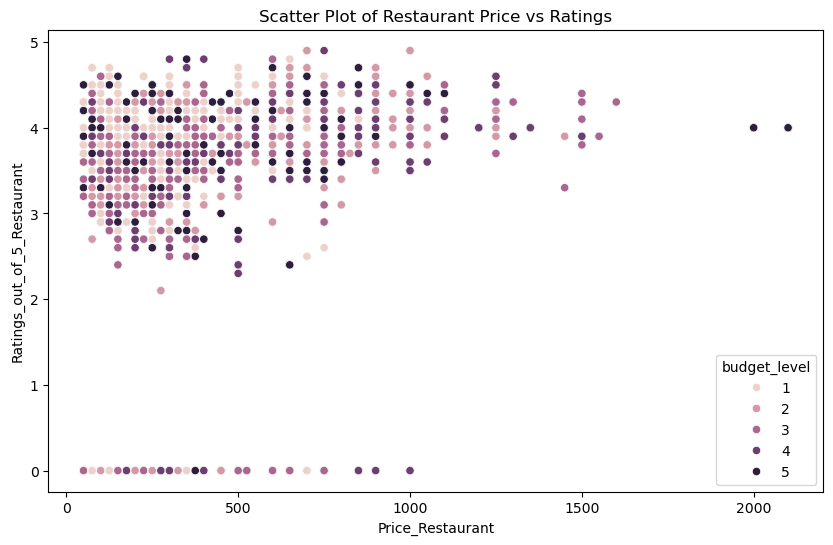

In [27]:
# Scatter plot for 'Price_Restaurant' vs 'Ratings_out_of_5_Restaurant'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price_Restaurant', y='Ratings_out_of_5_Restaurant', hue='budget_level', data=Final_Dataset)
plt.title('Scatter Plot of Restaurant Price vs Ratings')
plt.show()


C:\Users\Athar\OneDrive\Desktop\TripPlanner\env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Athar\OneDrive\Desktop\TripPlanner\env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Athar\OneDrive\Desktop\TripPlanner\env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Athar\OneDrive\Desktop\TripPlanner\env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureW

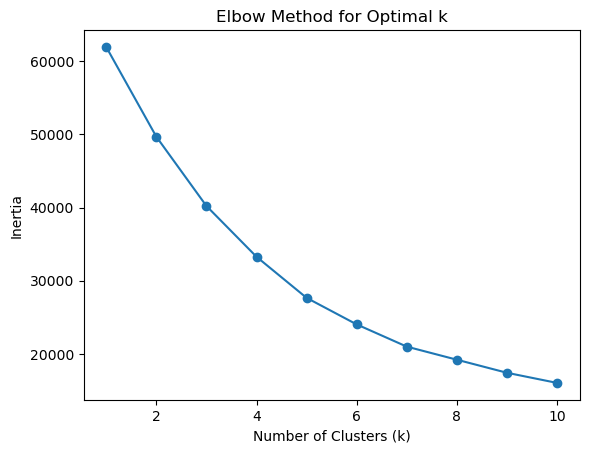

C:\Users\Athar\OneDrive\Desktop\TripPlanner\env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster Centers:
   Ratings_out_of_5_Restaurant  Price_Restaurant  Latitude_x__Restaurant  \
0                     3.356735        334.886608               18.597157   
1                     3.541214        353.102837               19.871867   
2                     3.753333        456.111111               45.897143   

   Longitude_x__Restaurant  Rating_Place  hotel_star_rating_Hotel  \
0                74.271245      4.419589                 1.976540   
1                80.891778      1.660559                 1.815997   
2                -4.069937      2.566667                 1.533333   

   mmt_review_score_Hotel  Price_Hotel  
0                3.899453  3866.221701  
1                3.334121  3702.071710  
2                3.433333  5633.100000  


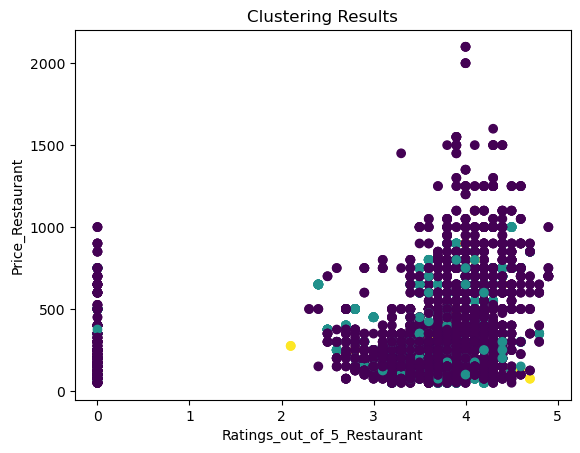

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load your dataset
# Replace 'your_dataset.csv' with the actual file path or URL
data = pd.read_csv('Final_Prepared_data2.0.csv')

# Select relevant features for clustering
features_for_clustering = data[['Ratings_out_of_5_Restaurant', 'Price_Restaurant', 'Latitude_x__Restaurant', 'Longitude_x__Restaurant',
                                'Rating_Place', 'hotel_star_rating_Hotel', 'mmt_review_score_Hotel', 'Price_Hotel']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Based on the Elbow Method, choose the optimal value for k (number of clusters)
# In this example, let's say the optimal k is 3
optimal_k = 3

# Perform k-means clustering with the optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

# Print the cluster centers (representative points for each cluster)
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
print("Cluster Centers:")
print(pd.DataFrame(cluster_centers, columns=features_for_clustering.columns))

# Add the 'Cluster' column to your original dataset
# Now you can use this 'Cluster' column for making recommendations

# Visualize the clusters (you can choose any two features for plotting)
plt.scatter(data['Ratings_out_of_5_Restaurant'], data['Price_Restaurant'], c=data['Cluster'], cmap='viridis')
plt.title('Clustering Results')
plt.xlabel('Ratings_out_of_5_Restaurant')
plt.ylabel('Price_Restaurant')
plt.show()
